In [1]:
from pylab import *
import numpy as np
import glob
import os
import pandas as pd
#%matplotlib notebook
%matplotlib widget

In [2]:
pat = '/CRACO/DATA_01/craco/SB06[0123]*/scans/00/2*/results/candidates.b00.txt'
files = glob.glob(pat)
print(len(files))

18261


In [3]:
def getsize(f):
    try:
        sz = os.path.getsize(f)
    except:
        sz = 0

    return sz

In [4]:
sizes = [getsize(f) for f in files]

In [5]:
df = pd.DataFrame({'filename':files, 'size':sizes})
df = df[df['size'] > 150].reset_index()

Text(0, 0.5, 'file size')

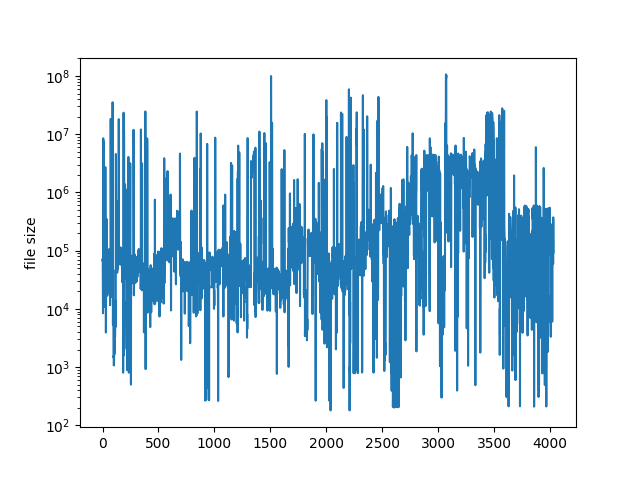

In [6]:
semilogy(df['size'].values)
ylabel('file size')
#ylim(0,1e7)
#xlim(2500,3000)

In [7]:
plot(df['size'].values)
ylabel('file size')
ylim(0,1e7)
xlim(2860,3000)

/tmp/ipykernel_4045230/1199380537.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ylim(0,1e7)


(2860.0, 3000.0)

In [8]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

len(df)
df.iloc[0:10]

,index,filename,size
0,0,/CRACO/DATA_01/craco/SB060000/scans/00/20240313180307/results/candidates.b00.txt,68408
1,1,/CRACO/DATA_01/craco/SB060000/scans/00/20240313182339/results/candidates.b00.txt,72708
2,2,/CRACO/DATA_01/craco/SB060000/scans/00/20240313184414/results/candidates.b00.txt,61294
3,3,/CRACO/DATA_01/craco/SB060000/scans/00/20240313190446/results/candidates.b00.txt,11609
4,4,/CRACO/DATA_01/craco/SB060000/scans/00/20240313192522/results/candidates.b00.txt,8393
5,5,/CRACO/DATA_01/craco/SB060000/scans/00/20240313194556/results/candidates.b00.txt,9877
6,6,/CRACO/DATA_01/craco/SB060001/scans/00/20240313200511/results/candidates.b00.txt,8524207
7,7,/CRACO/DATA_01/craco/SB060003/scans/00/20240313203131/results/candidates.b00.txt,7710632
8,8,/CRACO/DATA_01/craco/SB060004/scans/00/20240313203435/results/candidates.b00.txt,4336824
9,9,/CRACO/DATA_01/craco/SB060005/scans/00/20240313203920/results/candidates.b00.txt,43783


In [9]:
df['size'].values

array([ 68408,  72708,  61294, ..., 373085, 324419,  93023])

In [10]:
plot(df['size'])
ylim(0,4e7)

/tmp/ipykernel_4045230/603272807.py:2: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ylim(0,4e7)


(92.60872083964973, 40000000.0)


# Look at UV plane


In [510]:
thedir = '/CRACO/DATA_01/craco/SB063431/scans/00/20240701045929/offline_ndm256_t6_dump/'
thedir = '/CRACO/DATA_01/craco/SB063431/scans/00/20240701045929/manual' #original broken - contains ones
thedir = '/CRACO/DATA_01/craco/SB063431/scans/00/20240701045929/manual2' #contains ones - maybe fixed

In [511]:
ls $thedir

boxcar_hist_iblk0.npy    mainbuf_iblk148_ib5.npy  mainbuf_iblk92_ib6.npy
boxcar_hist_iblk100.npy  mainbuf_iblk148_ib6.npy  mainbuf_iblk92_ib7.npy
boxcar_hist_iblk104.npy  mainbuf_iblk148_ib7.npy  mainbuf_iblk96_ib0.npy
boxcar_hist_iblk108.npy  mainbuf_iblk152_ib0.npy  mainbuf_iblk96_ib1.npy
boxcar_hist_iblk112.npy  mainbuf_iblk152_ib1.npy  mainbuf_iblk96_ib2.npy
boxcar_hist_iblk116.npy  mainbuf_iblk152_ib2.npy  mainbuf_iblk96_ib3.npy
boxcar_hist_iblk120.npy  mainbuf_iblk152_ib3.npy  mainbuf_iblk96_ib4.npy
boxcar_hist_iblk124.npy  mainbuf_iblk152_ib4.npy  mainbuf_iblk96_ib5.npy
boxcar_hist_iblk128.npy  mainbuf_iblk152_ib5.npy  mainbuf_iblk96_ib6.npy
boxcar_hist_iblk12.npy   mainbuf_iblk152_ib6.npy  mainbuf_iblk96_ib7.npy
boxcar_hist_iblk132.npy  mainbuf_iblk152_ib7.npy  plan_iblk108.pkl
boxcar_hist_iblk136.npy  mainbuf_iblk156_ib0.npy  plan_iblk120.pkl
boxcar_hist_iblk140.npy  mainbuf_iblk156_ib1.npy  plan_iblk12.pkl
boxcar_hist_iblk144.npy  mainbuf_iblk156_ib2.npy  plan_iblk132.pkl
box

In [512]:
def load_bc(iblk):
    bc = np.load(os.path.join(thedir, f'boxcar_hist_iblk{iblk}.npy'))
    return bc

def load_input(iblk):
    bc = np.load(os.path.join(thedir, f'input_iblk{iblk}.npy'), allow_pickle=True)
    return bc

def load_uv_data(iblk):
    bc = np.load(os.path.join(thedir, f'uv_data_iblk{iblk}.npy'))
    return bc

def load_mainbuf(iblk, ib):
    bc = np.load(os.path.join(thedir, f'mainbuf_iblk{iblk}_ib{ib}.npy'))
    return bc

In [513]:
input = load_input(12)
input.dtype

dtype('complex64')

In [514]:
input.shape

(190, 240, 256)

In [515]:
input[0,0,0]

(512+0j)

In [516]:
np.all(input == 512)

True

In [517]:
input_end = load_input(0)
assert np.all(input_end == input)

/tmp/ipykernel_4045230/586471937.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure()


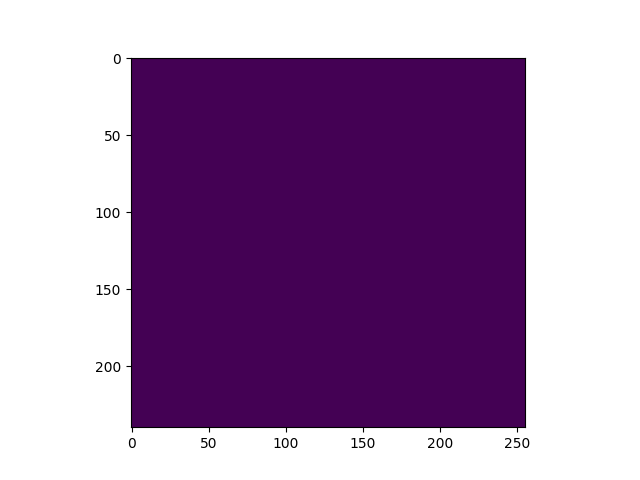

In [518]:
figure()
imshow(input[0,:,:].real)

In [519]:
uvdata = load_uv_data(12)
uvdata.shape


(1024, 256, 32, 8, 2)

In [520]:
uvdata[1,0,:,3,0]

array([  0,   0, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512], dtype=int16)

In [521]:
uv_end = load_uv_data(28)

In [522]:
#for iblk in range(10):
#    uvdata = load_uv_data(iblk)
#    print(iblk, uvdata.sum(), sum(uvdata == 0), uvdata.size)

In [523]:
np.all(uvdata == uv_end)

False

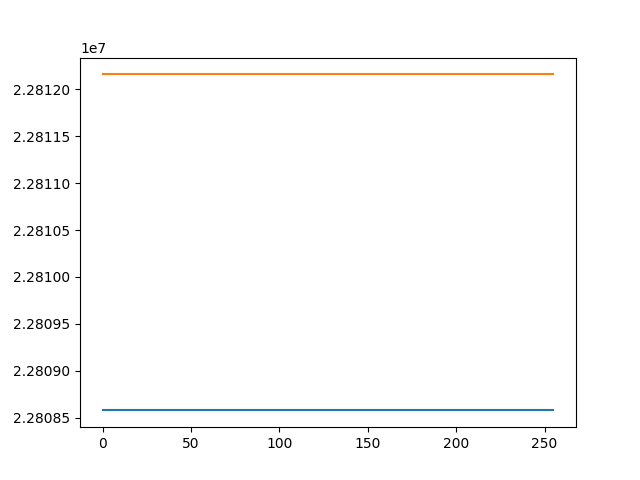

In [524]:
figure()
plot(uvdata.sum(axis=(0,2,3,4)))
plot(uv_end.sum(axis=(0,2,3,4)))

In [525]:
uvdata.shape

(1024, 256, 32, 8, 2)

In [526]:
c1 = (uvdata[:,0,...] != 0).sum()
c2 = (uv_end[:,0,...] != 0).sum()
print('Sum', uvdata[:,0,...].sum(), uv_end[:,0,...].sum(), 'count', c1, c2 )

Sum 22808576 22812160 count 44548 44555


In [527]:
c2 - c1

7

In [528]:
import pickle
from astropy.coordinates import SkyCoord

def load_plan(iblk):

    from craft.craco_plan import PipelinePlan
    f = os.path.join(thedir, f'plan_iblk{iblk}.pkl')
    with open(f, 'rb') as fin:
        pln = pickle.load(fin)
        

    return pln
p1 = load_plan(12)
p2 = load_plan(24)

In [529]:
import astropy
print(astropy.__version__)

6.0.0


In [530]:
len(p1.fdmt_plan.runs)

473

In [531]:
len(p2.fdmt_plan.runs)

476

In [532]:
uvdata.shape

(1024, 256, 32, 8, 2)

In [533]:
p1.fdmt_plan.runs[0]

ncells=8 fch1=759990740.7407407 chan_start=0 total_overlap=256

In [534]:
p1.fdmt_plan.runs[0].cells

[Cell blid=5141.0 chan=0-31 freq=759.99-790.99 uvpix=(7, 1) upper_idx=262 uvpix_upper=(7, 1),
 Cell blid=515.0 chan=0-31 freq=759.99-790.99 uvpix=(1, 255) upper_idx=510 uvpix_upper=(255, 1),
 Cell blid=773.0 chan=0-31 freq=759.99-790.99 uvpix=(252, 254) upper_idx=513 uvpix_upper=(4, 2),
 Cell blid=1286.0 chan=0-31 freq=759.99-790.99 uvpix=(9, 254) upper_idx=756 uvpix_upper=(247, 2),
 Cell blid=1545.0 chan=0-31 freq=759.99-790.99 uvpix=(242, 253) upper_idx=776 uvpix_upper=(14, 3),
 Cell blid=2834.0 chan=0-31 freq=759.99-790.99 uvpix=(243, 252) upper_idx=1027 uvpix_upper=(13, 4),
 Cell blid=2837.0 chan=0-31 freq=759.99-790.99 uvpix=(15, 4) upper_idx=1029 uvpix_upper=(15, 4),
 Cell blid=2838.0 chan=0-31 freq=759.99-790.99 uvpix=(21, 4) upper_idx=1035 uvpix_upper=(21, 4)]

In [535]:
p1.fdmt_plan.runs[0].cells[0].nchan

32

In [536]:
uvdata.shape

(1024, 256, 32, 8, 2)

In [537]:
p1_nchan = np.zeros_like(uvdata)
p2_nchan = np.zeros_like(uv_end)

In [538]:
def plan_to_nchan(plan, x):
    for irun, run in enumerate(plan.fdmt_plan.runs):
        #if irun == 59:
        #    print(irun, run)
        if run is None:
            continue
        for ic, c in enumerate(run.cells):
            if c is None:
                continue

            
            cstart = c.chan_start
            cend = c.chan_end+1
            nchan = cend - cstart # number of channels being copied from this baseline
            run_cstart = run.chan_start # first channel in this run
            out_cstart = cstart - run_cstart # The channel in this run that the data will be copied into
            out_cend = out_cstart + nchan

            cslice = slice(out_cstart, out_cend)
            x[irun, :, cslice, ic, 0] = 512
            #if irun == 59:
            #    print(ic, c, c.chan_slice, ic, x[irun, :, cslice, ic, 0])
            
    return x

_ = plan_to_nchan(p1, p1_nchan)
_ = plan_to_nchan(p2, p2_nchan)
p1.fdmt_plan.runs[59].cells[0]

Cell blid=5141.0 chan=32-63 freq=791.99-822.99 uvpix=(7, 1) upper_idx=262 uvpix_upper=(7, 1)

In [539]:
p1.fdmt_plan.runs[59].cells

[Cell blid=5141.0 chan=32-63 freq=791.99-822.99 uvpix=(7, 1) upper_idx=262 uvpix_upper=(7, 1),
 Cell blid=515.0 chan=32-63 freq=791.99-822.99 uvpix=(1, 255) upper_idx=510 uvpix_upper=(255, 1),
 Cell blid=773.0 chan=32-63 freq=791.99-822.99 uvpix=(252, 254) upper_idx=513 uvpix_upper=(4, 2),
 Cell blid=1286.0 chan=32-63 freq=791.99-822.99 uvpix=(9, 254) upper_idx=756 uvpix_upper=(247, 2),
 Cell blid=774.0 chan=32-63 freq=791.99-822.99 uvpix=(5, 252) upper_idx=1265 uvpix_upper=(251, 4),
 Cell blid=518.0 chan=32-63 freq=791.99-822.99 uvpix=(6, 251) upper_idx=1515 uvpix_upper=(250, 5),
 Cell blid=777.0 chan=32-63 freq=791.99-822.99 uvpix=(247, 249) upper_idx=1773 uvpix_upper=(9, 7),
 Cell blid=2314.0 chan=32-63 freq=791.99-822.99 uvpix=(8, 249) upper_idx=2012 uvpix_upper=(248, 7)]

In [540]:
uvdata[59,0,:,0,0]

array([512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512], dtype=int16)

In [541]:
p1_nchan[59,0,:,0,0]

array([512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512], dtype=int16)

In [542]:
np.all(p1_nchan == uvdata)

True

In [543]:
for irun, run in enumerate(p1.fdmt_plan.runs):
    if not np.all(uvdata[irun, ...] == p1_nchan[irun, ...]):
        print('Irun', irun, 'not equal')
        break
    
    

In [544]:
uvdata.shape

(1024, 256, 32, 8, 2)

In [545]:
all_idxs = np.where(uvdata[irun, 0, ...] != p1_nchan[irun, 0, ...])
print(all_idxs)
#for idxs in all_idxs:
#    print(idxs, uvdata[irun, 0, idxs[0], idxs[1], idxs[2]], p1_nchan[irun, 0, idxs[0], idxs[1], idxs[2]])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [546]:
uvdata[irun,0,:,:,0]

array([[512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   

In [547]:
p1_nchan[irun,0,:,:,0]

array([[512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [512,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   

In [548]:
p1_nchan[irun,0,:,:,0] - uvdata[irun,0,:,:,0]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [549]:
p1.fdmt_plan.runs[irun].cells

[Cell blid=3864.0 chan=96-99 freq=855.99-858.99 uvpix=(19, 49) upper_idx=31701 uvpix_upper=(237, 207),
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [550]:
irun

472

In [551]:
mb = load_mainbuf(12,0)
mb.shape

(57, 186, 5, 256, 8, 2)

In [31]:
np.all(mb == 0)

False

In [32]:
mb[0,0,0,0,:,:]

array([[16384,     0],
       [16384,     0],
       [16384,     0],
       [16384,     0],
       [16384,     0],
       [16384,     0],
       [16384,     0],
       [16384,     0]], dtype=int16)

In [33]:
mbend = load_mainbuf(222,0)

In [34]:
np.all(mb == mbend)

False

In [553]:
blks = (4,8,12,16,168)
bcs = [load_bc(blk) for blk in blks] # boxcar 0 contains nothing as it hasn't run yet!


In [554]:
bcs[0].shape

(1024, 7, 256, 256)

In [555]:
np.all(bcs[0] == 0)

False

In [556]:
np.all(bcs[0][0,0,:,:] == bcs[0][0,1,:,:])

False

In [557]:
print('RMS at start', bcs[0][0, ...].std(), 'RMS at end', bcs[-1][0, ...].std())

RMS at start 392.27004933805443 RMS at end 394.7026541833804


Image -32727 -32794 392.2667448258752 394.69904109102254
UV 20454.639854390738 20438.728896950055 1.500169305776115 1.509922785946589


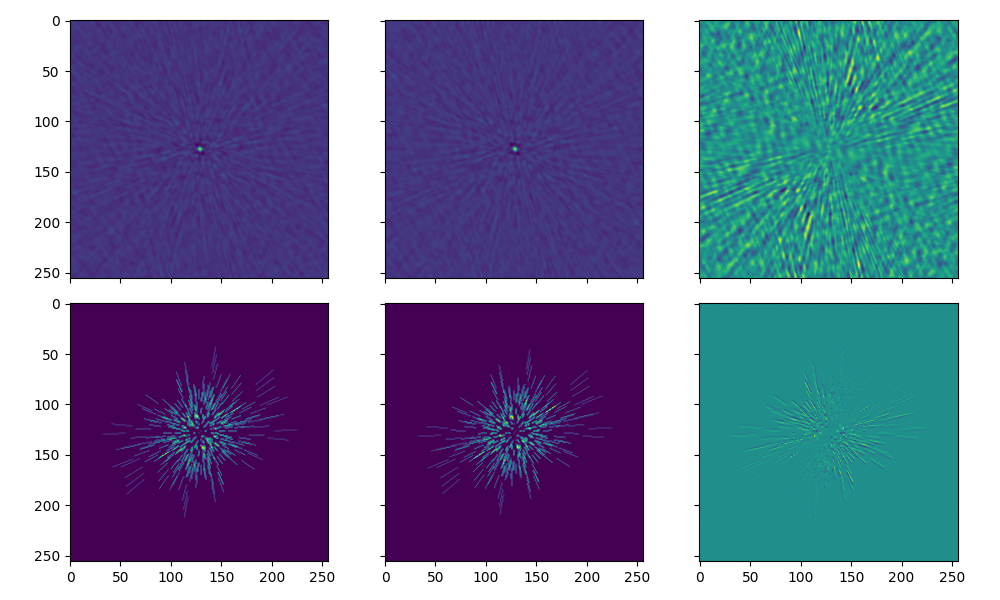

In [558]:
def plt_uvdiff(i0,i1):
    fig, ax = subplots(2,3, sharex=True, sharey=True)
    i0 = np.fft.fftshift(i0)
    i1 = np.fft.fftshift(i1)
    u0 = np.fft.fftshift(abs(np.fft.ifft2(i0)))
    u1 = np.fft.fftshift(abs(np.fft.ifft2(i1)))
    print('Image', i0.sum(), i1.sum(), i0.std(), i1.std())
    print('UV', u0.sum(), u1.sum(), u0.std(), u1.std())
    #u0 = np.where(u0 > 0.01, 1, 0)
    #u1 = np.where(u1 > 0.01, 1, 0)
    
    ax[0,0].imshow(i0)
    ax[0,1].imshow(i1)
    ax[1,0].imshow(u0)
    ax[1,1].imshow(u1)
    ax[0,2].imshow(i1 - i0)
    ax[1,2].imshow(u1 - u0)
    fig.set_size_inches((10,6))
    fig.tight_layout()
    return fig

i0 = bcs[0][0,0,...] + 1j*bcs[0][0,1,...]
_ = plt_uvdiff(bcs[0][0,0,...],bcs[-1][0,0,...])

NameError: name 'u0' is not defined

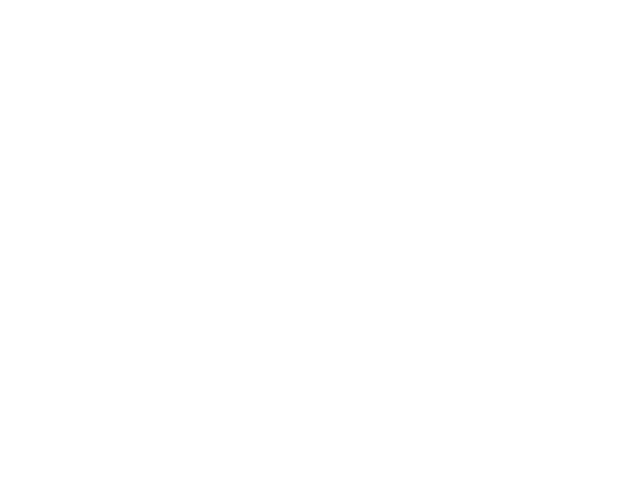

In [41]:
bins=np.arange(0, 10, 0.1)
figure()
_ = hist(u0.flatten(), bins=bins, histtype='step', label='start')
_ = hist(u1.flatten(), bins=bins, histtype='step', label='end')
ylim(0, 300)
legend()

In [ ]:
u0[u0< 0.01] = 0
u1[u1< 0.01] = 0

In [ ]:
sum(u0 > 0)

In [ ]:
sum(u1 > 0)